In [1]:
import pandas as pd

# Load the dataset
data_path = './data/test_x.csv'
df = pd.read_csv(data_path)

df.head()

   Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Pclass
0       3    0    2     0         2      1        1           6
1       3    1    2     0         0      3        0           6
2       2    0    3     1         2      1        1           6
3       3    0    1     1         0      1        1           3
4       3    1    1     1         0      3        0           3

In [2]:
# Create FamilySize column
family_size_constraint = 1 + 1  # One sibling/spouse and one parent/child

df['FamilySize'] = df['IsAlone'] + family_size_constraint

df['FamilySize'].mean().round(1)

np.float64(2.6)

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

[No output generated]

In [4]:
data_path = './data/test_x.csv'
data = pd.read_csv(data_path)
data.head()

   Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Pclass
0       3    0    2     0         2      1        1           6
1       3    1    2     0         0      3        0           6
2       2    0    3     1         2      1        1           6
3       3    0    1     1         0      1        1           3
4       3    1    1     1         0      3        0           3

In [5]:
# Extract relevant columns for analysis
X = data[['Age', 'Pclass']]
y = data['Fare']

# Add constant for statsmodels
def add_constant(X):
    return sm.add_constant(X)

X = add_constant(X)

# Perform regression analysis
model = sm.OLS(y, X).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     199.4
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           2.07e-61
Time:                        14:17:47   Log-Likelihood:                -509.15
No. Observations:                 418   AIC:                             1024.
Df Residuals:                     415   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

In [6]:
import pandas as pd
weather_data = pd.read_csv('./data/weather_train.csv')
weather_data.head()

                   time  sun  temperature  chill  humidity wind direction  \
0  2017-01-01T00:00:00Z  0.0         -1.7   -5.6      99.0            ZZW   
1  2017-01-01T00:10:00Z  0.0         -1.7   -5.6      99.0            ZZW   
2  2017-01-01T00:20:00Z  0.0         -1.7   -5.6      99.0            ZZW   
3  2017-01-01T00:30:00Z  0.0         -1.6   -5.4      99.0              Z   
4  2017-01-01T00:40:00Z  0.0         -1.6   -5.4      99.0              Z   

   wind speed  visibility  air pressure  
0         3.0       197.0        1026.0  
1         3.0       195.0        1025.8  
2         3.0       271.0        1025.6  
3         3.0       316.0        1025.4  
4         3.0       334.0        1025.3  

In [7]:
# Drop rows with missing values in 'temperature' or 'humidity' before calculating correlation
weather_data_cleaned = weather_data.dropna(subset=['temperature', 'humidity'])

# Calculate Pearson correlation coefficient
correlation_coefficient = weather_data_cleaned['temperature'].corr(weather_data_cleaned['humidity'], method='pearson')
correlation_coefficient

np.float64(-0.6363773815186421)

In [8]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
dataset_path = './data/2014_q4.csv'
data = pd.read_csv(dataset_path)

# Extract the relevant column
distribution_column = data['Trips over the past 24-hours (midnight to 11:59pm)'].dropna()

# Perform Shapiro-Wilk test for normality
shapiro_stat, shapiro_p_value = stats.shapiro(distribution_column)

# Compute skewness and kurtosis
skewness_value = stats.skew(distribution_column)
kurtosis_value = stats.kurtosis(distribution_column)

(shapiro_stat, shapiro_p_value, skewness_value, kurtosis_value)

(np.float64(0.9543095491220899),
 np.float64(0.0027291466836339875),
 np.float64(0.1520317726967334),
 np.float64(-1.1336054960924962))

In [9]:
import pandas as pd
import numpy as np

# Load CSV file
data_path = './data/2014_q4.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset for context
df.head()

        Date  Trips over the past 24-hours (midnight to 11:59pm)  \
0  10/1/2014                                              31197    
1  10/2/2014                                              38286    
2  10/3/2014                                              38956    
3  10/4/2014                                              15088    
4  10/5/2014                                              26247    

   Cumulative trips (since launch):  \
0                          13296973   
1                          13335259   
2                          13374215   
3                          13389303   
4                          13415550   

   Miles traveled today (midnight to 11:59 pm)  Miles traveled to date:  \
0                                        44612                 23121175   
1                                        60639                 23181814   
2                                        65739                 23247553   
3                                        24254          

In [10]:
# Perform feature engineering by creating "Trips per Membership" column
# Calculate the number of trips per membership by dividing trips over the past 24 hours by total annual memberships sold
df['Trips per Membership'] = df['Trips over the past 24-hours (midnight to 11:59pm)'] / df['Total Annual Memberships Sold']

# Handle division by zero and replace infinity values with zero
df.replace([np.inf, -np.inf], 0, inplace=True)

# Calculate mean and median for "Trips per Membership"
trips_per_membership_mean = round(df['Trips per Membership'].mean(), 2)
trips_per_membership_median = round(df['Trips per Membership'].median(), 2)

# Calculate mean and median for "Trips over the past 24-hours (midnight to 11:59pm)"
trips_per_day_mean = round(df['Trips over the past 24-hours (midnight to 11:59pm)'].mean(), 2)
trips_per_day_median = round(df['Trips over the past 24-hours (midnight to 11:59pm)'].median(), 2)

trips_per_membership_mean, trips_per_membership_median, trips_per_day_mean, trips_per_day_median

(np.float64(0.17), np.float64(0.16), np.float64(21144.08), np.float64(19711.0))

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Load the dataset
data_path = './data/2014_q4.csv'
df = pd.read_csv(data_path)

# Analyze original distribution
trips_column = 'Trips over the past 24-hours (midnight to 11:59pm)'
pre_mean = round(df[trips_column].mean(), 2)
pre_median = round(df[trips_column].median(), 2)
pre_sd = round(df[trips_column].std(), 2)
pre_skewness = round(skew(df[trips_column], nan_policy='omit'), 2)
pre_kurtosis = round(kurtosis(df[trips_column], nan_policy='omit'), 2)

# Impute missing values for specified columns
for column in ['24-Hour Passes Purchased (midnight to 11:59 pm)', '7-Day Passes Purchased (midnight to 11:59 pm)']:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

# Analyze post-imputation distribution
post_mean = round(df[trips_column].mean(), 2)
post_median = round(df[trips_column].median(), 2)
post_sd = round(df[trips_column].std(), 2)
post_skewness = round(skew(df[trips_column], nan_policy='omit'), 2)
post_kurtosis = round(kurtosis(df[trips_column], nan_policy='omit'), 2)

(pre_mean, pre_median, pre_sd, pre_skewness, pre_kurtosis, post_mean, post_median, post_sd, post_skewness, post_kurtosis)

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[1], line 19
     17 # Impute missing values for specified columns
     18 for column in ['24-Hour Passes Purchased (midnight to 11:59 pm)', '7-Day Passes Purchased (midnight to 11:59 pm)']:
---> 19     mean_value = df[column].mean()
     20     df[column].fillna(mean_value, inplace=True)
     22 # Analyze post-imputation distribution

File /usr/local/lib/python3.11/site-packages/pandas/core/series.py:6570, in Series.mean(self, axis, skipna, numeric_only, **kwargs)
   6562 @doc(make_doc("mean", ndim=1))
   6563 def mean(
   6564     self,
   (...)   6568     **kwargs,
   6569 ):
-> 6570     return NDFrame.mean(self, axis, skipna, numeric_only, **kwargs)

File /usr/local/lib/python3.11/site-packages/pandas/core/generic.py:12485, in NDFrame.mean(self, axis, skipna, numeric_only, **kwargs)
  12478 def mean(
  12479     self,
  12480

In [12]:
# Investigate the dataset to identify issues causing errors in mean calculation
missing_columns = ['24-Hour Passes Purchased (midnight to 11:59 pm)', '7-Day Passes Purchased (midnight to 11:59 pm)']
non_numeric_check = {}

for column in missing_columns:
    non_numeric_check[column] = df[column].apply(lambda x: not pd.api.types.is_numeric_dtype(type(x))).sum()

non_numeric_check

{'24-Hour Passes Purchased (midnight to 11:59 pm)': np.int64(92),
 '7-Day Passes Purchased (midnight to 11:59 pm)': np.int64(92)}

In [13]:
# Display the non-numeric entries in columns to identify possible data contamination or format issues
non_numeric_samples = {}

for column in missing_columns:
    non_numeric_samples[column] = df[df[column].apply(lambda x: not pd.api.types.is_numeric_dtype(type(x)))][column].unique()

non_numeric_samples

{'24-Hour Passes Purchased (midnight to 11:59 pm)': array(['330', '602', '1276', '617', '1470', '710', '593', '667', '709',
        '905', '528', '2083', '749', '869', '506', '499', '1180', '1806',
        '1000', '514', '539', '110', '74', '722', '2093', '1220', '519',
        '628', '466', '557', '653', '98', '480', '568', '665', '513',
        '416', '878', '952', '607', '599', '325', '252', '242', '522',
        '319', '25', '78', '102', '160', '131', '345', '374', '365', '14',
        '209', '235', '449', '281', '45', '65', '191', '153', '59', '254',
        '60', '18', '23', '144', '151', '324', '326', '186', '119', '158',
        '145', '170', '156', '68', '36', '\t456\t41', '464', '58', '37',
        '214', '216'], dtype=object),
 '7-Day Passes Purchased (midnight to 11:59 pm)': array(['48', '86', '107', '26', '90', '99', '81', '71', '78', '34', '80',
        '60', '101', '82', '61', '105', '63', '57', '74', '30', '19', '84',
        '83', '73', '79', '70', '75', '10', '44', '5

In [14]:
# Clean contaminated data by coercing values into numeric format and replacing errors with NaN
for column in missing_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Reattempt mean imputation after cleaning
for column in missing_columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

# Analyze post-imputation distribution for "Trips over the past 24-hours (midnight to 11:59pm)"
post_mean = round(df[trips_column].mean(), 2)
post_median = round(df[trips_column].median(), 2)
post_sd = round(df[trips_column].std(), 2)
post_skewness = round(skew(df[trips_column], nan_policy='omit'), 2)
post_kurtosis = round(kurtosis(df[trips_column], nan_policy='omit'), 2)

(pre_mean, pre_median, pre_sd, pre_skewness, pre_kurtosis, post_mean, post_median, post_sd, post_skewness, post_kurtosis)

/tmp/ipykernel_1797/391945807.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)


(np.float64(21144.08),
 np.float64(19711.0),
 np.float64(9889.93),
 np.float64(0.15),
 np.float64(-1.13),
 np.float64(21144.08),
 np.float64(19711.0),
 np.float64(9889.93),
 np.float64(0.15),
 np.float64(-1.13))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for male passengers who did not survive
male_non_survivors = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]['Age'].dropna()

# Kernel Density Estimation for males
plt.figure(figsize=(10, 6))
sns.kdeplot(male_non_survivors, label='Male Non-Survivors', shade=True)
plt.title('KDE of Ages for Male Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

/tmp/ipykernel_1398/3314980819.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(female_non_survivors, label='Female Non-Survivors', shade=True)


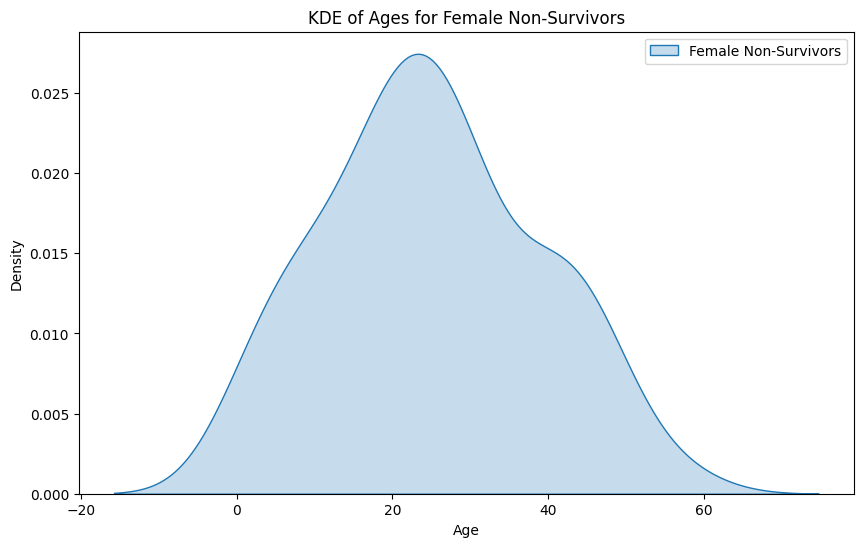

In [16]:
# Filter data for female passengers who did not survive
female_non_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]['Age'].dropna()

# Kernel Density Estimation for females
plt.figure(figsize=(10, 6))
sns.kdeplot(female_non_survivors, label='Female Non-Survivors', shade=True)
plt.title('KDE of Ages for Female Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [17]:
from scipy.stats import ks_2samp

# Perform the Kolmogorov-Smirnov test
ks_result = ks_2samp(male_non_survivors, female_non_survivors)

# Set the significance level
alpha = 0.05

is_significantly_different = ks_result.pvalue < alpha
is_significantly_different

np.True_

In [18]:
import pandas as pd

data_path = './data/titanic_train.csv'

data = pd.read_csv(data_path)
data.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

In [19]:
# Calculate IQR for the 'Fare' column
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Fare'] < lower_bound) | (data['Fare'] > upper_bound)]

# Calculate the number of outliers and their range
outlier_count = len(outliers)
outlier_range_low = round(outliers['Fare'].min(), 2)
outlier_range_high = round(outliers['Fare'].max(), 2)

outlier_count, outlier_range_low, outlier_range_high

(116, np.float64(66.6), np.float64(512.33))

In [20]:
import pandas as pd

data = pd.read_csv('./data/titanic_train.csv')
data['FamilySize'] = data['SibSp'] + data['Parch']

mean_familysize_survived = round(data[data['Survived'] == 1]['FamilySize'].mean(), 2)
mean_familysize_did_not_survive = round(data[data['Survived'] == 0]['FamilySize'].mean(), 2)

mean_familysize_survived, mean_familysize_did_not_survive

(np.float64(0.94), np.float64(0.88))

In [21]:
import pandas as pd
from scipy.stats import pearsonr

# Load the Titanic dataset
data_path = './data/titanic_train.csv'
df = pd.read_csv(data_path)

# Filter only passengers who embarked from Cherbourg
cherbourg_passengers = df[df['Embarked'] == 'C']

# Calculate the Pearson correlation coefficient and p-value between Pclass and Fare
r_value, p_value = pearsonr(cherbourg_passengers['Pclass'], cherbourg_passengers['Fare'])

# Determine significance at alpha = 0.01
significance = 'significant' if p_value < 0.01 else 'not significant'

(f"@correlation_coefficient[{r_value:.2f}]\n"
 f"@p_value[{p_value:.4f}]\n"
 f"@relationship_significance[{significance}]")

'@correlation_coefficient[-0.53]\n@p_value[0.0000]\n@relationship_significance[significant]'

In [22]:
import pandas as pd

data_path = './data/titanic_train.csv'
df = pd.read_csv(data_path)

# Remove rows with missing age
df = df.dropna(subset=['Age'])

# Calculate average age per ticket class
average_age_pclass = df.groupby('Pclass')['Age'].mean().round(2)
average_age_pclass

Pclass
1    38.23
2    29.88
3    25.14
Name: Age, dtype: float64

In [23]:
import pandas as pd
from scipy.stats import ttest_ind

data_path = './data/titanic_train.csv'
df = pd.read_csv(data_path)

# Filter data for male passengers who survived and didn't survive
survived_male = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]['Fare']
not_survived_male = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]['Fare']

# Calculate mean and standard deviation for both groups
mean_survived = round(survived_male.mean(), 2)
std_survived = round(survived_male.std(), 2)
mean_not_survived = round(not_survived_male.mean(), 2)
std_not_survived = round(not_survived_male.std(), 2)

# Conduct t-test
t_stat, p_value = ttest_ind(survived_male, not_survived_male, equal_var=False)

# Determine if there is a significant difference
significance = 'significant' if p_value < 0.05 else 'not significant'

(mean_survived, std_survived, mean_not_survived, std_not_survived, significance)

(np.float64(40.82),
 np.float64(71.36),
 np.float64(21.96),
 np.float64(32.41),
 'significant')

In [24]:
import pandas as pd
from scipy.stats import zscore

# Load the data file
data_path = './data/bitconnect_price.csv'
data = pd.read_csv(data_path)

# Inspect first few rows
data.head()

           Date    Open    High     Low   Close     Volume   Market Cap
0  Sep 17, 2017  109.75  110.94  102.81  106.84  5,350,380  737,226,000
1  Sep 16, 2017  111.11  116.01  105.02  109.85  5,683,580  744,652,000
2  Sep 15, 2017   97.42  113.75   89.36  111.22  8,539,660  652,107,000
3  Sep 14, 2017  115.97  117.38   96.71   96.71  6,367,800  775,543,000
4  Sep 13, 2017  123.14  123.70  112.60  115.97  6,315,510  822,282,000

In [25]:
# Convert Volume column to numerical values
data['Volume'] = data['Volume'].replace({',': ''}, regex=True).astype(float)

# Calculate Z-scores for the Volume column
data['Z_score'] = zscore(data['Volume'])

# Find outliers
outliers = data[(data['Z_score'] > 3) | (data['Z_score'] < -3)]
outliers_count = outliers.shape[0]
outliers_count

1

In [26]:
import pandas as pd

# Load the bitconnect_price dataset
data_path = './data/bitconnect_price.csv'
bitconnect_data = pd.read_csv(data_path)

# Display the first few rows to inspect the file
bitconnect_data.head()

           Date    Open    High     Low   Close     Volume   Market Cap
0  Sep 17, 2017  109.75  110.94  102.81  106.84  5,350,380  737,226,000
1  Sep 16, 2017  111.11  116.01  105.02  109.85  5,683,580  744,652,000
2  Sep 15, 2017   97.42  113.75   89.36  111.22  8,539,660  652,107,000
3  Sep 14, 2017  115.97  117.38   96.71   96.71  6,367,800  775,543,000
4  Sep 13, 2017  123.14  123.70  112.60  115.97  6,315,510  822,282,000

In [27]:
# Convert Trading Volume (Volume column) to numeric type
bitconnect_data['Volume'] = bitconnect_data['Volume'].replace({',': ''}, regex=True).astype(float)

# Calculate the mean and median of the trading volumes
mean_volume = bitconnect_data['Volume'].mean()
median_volume = bitconnect_data['Volume'].median()

mean_volume, median_volume

(np.float64(2260508.041493776), np.float64(808585.0))

In [28]:
import pandas as pd
# Load the dataset file
file_path = './data/cost_data_with_errors.csv'
data = pd.read_csv(file_path)

# Count missing values, only considering null entries
data['max_sust_wind'].isnull().sum()

np.int64(24)

In [29]:
import pandas as pd
# Load the dataset and inspect it to initiate analysis
data_path = './data/cost_data_with_errors.csv'
df = pd.read_csv(data_path)
df.head()

   Unnamed: 0    name   dates_active  max_storm_cat  max_sust_wind   min_p  \
0           0  ARLENE  April 19 – 21              1       43.44880   990.0   
1           1    BRET   June 19 – 20              1       43.44880  1007.0   
2           2   CINDY   June 20 – 23              1       52.13856   991.0   
3           3    FOUR     July 5 – 7              0       26.06928  1009.0   
4           4     DON   July 17 – 18              1       43.44880  1005.0   

                                      areas_affected  damage_USD  deaths  \
0                                                NaN         0.0     0.0   
1  Guyana, Venezuela, Trinidad and Tobago, Windwa...   3000000.0     2.0   
2  Honduras, Belize, Cayman Islands, Yucatán Peni...  25000000.0     2.0   
3                                                NaN         0.0     0.0   
4    Windward Islands, Barbados, Trinidad and Tobago         0.0     0.0   

   year  damage_imputed  
0  2017               0  
1  2017               

In [30]:
# Find the storm with the highest maximum storm category
highest_storm = df.loc[df['max_storm_cat'].idxmax()]
highest_category_storm_name = highest_storm['name']

# Filter the DataFrame for the storm with the highest storm category
highest_category_storm_df = df[df['name'] == highest_category_storm_name]

# Find the maximum sustained wind speed for the storm
max_wind_speed = highest_category_storm_df['max_sust_wind'].max()
max_wind_speed

np.float64(156.41568)